In [ ]:
# 1. 표준 라이브러리
import sys
from pathlib import Path
import platform

# 2. 서드파티 라이브러리
import pandas as pd

# 2-2. 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.colors as mcolors


# 3. 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR, FONT_DIR

In [3]:
# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False

# 로컬 폰트 지정
font_path = FONT_DIR / 'HakgyoansimBareondotumB.ttf'
fm.fontManager.addfont(str(font_path))
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 컬러 지정
blue_colors = ["#0A4EE4", "#5271B7", "#9BC4D5", "#AED6E0", "#758A98", "#3E4E5F"]
purple_colors = ["#5D3A99", "#9370DB"]
blue_cmap = mcolors.LinearSegmentedColormap.from_list("blue_cmap", blue_colors[:4][::-1])


In [4]:
pandas_kwargs = {
    'memory_map': True,
    'parse_dates': ['검정일자', '출생일자', '최근분만일(연계)', '최근건유일(연계)', '최종수정일자(연계)', '가수제일자(연계)'],
    'date_format': '%Y%m%d',
    'dtype': {
        '개체번호': "Int64"
    }
}

report: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '유성분검사성적서.csv', **pandas_kwargs)

/tmp/ipykernel_3195646/431907166.py:10: DtypeWarning: Columns (30,48) have mixed types. Specify dtype option on import or set low_memory=False.
  report: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '유성분검사성적서.csv', **pandas_kwargs)


In [5]:
report.columns

Index(['농장아이디', '착유일련번호', '개체번호', '혈통번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백',
       '무지고형분', '체세포수', '우유내요소태질소', '305일유량', '305일유지량', '305일유단백',
       '305일무지고형분', '성년유량', '성년유지량', '성년유단백량', '성년무지고형분량', '전산차비유지속성',
       '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량', '비유초기평균유지율', '비유초기평균단백율',
       '비유초기평균MNU', '최고유량체세포', '건유전마지막유량', '전산차건유전유량', '개체명', '농장관리번호', '출생일자',
       '산차', '최근분만일(연계)', '최근건유일(연계)', '분만나이(연계)', '가수제코드(연계)', '가수제일자(연계)',
       '농후사료비(연계)', '농후사료급여량(연계)', '공태일수', '최종수정일자(연계)', '최종수정횟수(연계)',
       '최종수정정액코드(연계)', '체점수(연계)', '분만후첫수정일까지일수', '데이터입력코드', '유량', '유성분검사일련번호',
       '검정일시(ICT)', '단백율', '고형율', '유당'],
      dtype='object')

In [6]:
report.head()

,농장아이디,착유일련번호,개체번호,혈통번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,...,최종수정정액코드(연계),체점수(연계),분만후첫수정일까지일수,데이터입력코드,유량,유성분검사일련번호,검정일시(ICT),단백율,고형율,유당
0,20249,NaN,20120709020022,NaN,2020-01-11,154,6.31,2.86,8.43,141,...,250HO13267,NaN,186.0,S04303,59950,NaN,NaN,NaN,NaN,NaN
1,20249,NaN,20120626020043,NaN,2020-01-11,457,0.00,0.00,0.00,0,...,7HO13250,NaN,127.0,S04303,59951,NaN,NaN,NaN,NaN,NaN
2,20249,NaN,20120504020095,NaN,2020-01-11,52,6.10,2.80,8.53,34,...,200HO06480,NaN,64.0,S04303,59945,NaN,NaN,NaN,NaN,NaN
3,20249,NaN,20111008020210,NaN,2020-01-11,115,4.34,3.05,8.97,106,...,14HO07770,NaN,50.0,S04303,59947,NaN,NaN,NaN,NaN,NaN
4,20249,NaN,20121014020049,NaN,2020-01-11,290,5.56,3.70,9.23,220,...,7HO13250,NaN,180.0,S04303,59958,NaN,NaN,NaN,NaN,NaN


In [7]:
report.isnull().sum()

농장아이디                0
착유일련번호          100549
개체번호              8535
혈통번호            100549
검정일자                 0
누적착유일(연계)            0
유지방율                 0
유단백                  0
무지고형분                0
체세포수                 0
우유내요소태질소             0
305일유량               0
305일유지량              0
305일유단백              0
305일무지고형분            0
성년유량                 0
성년유지량                0
성년유단백량               0
성년무지고형분량             0
전산차비유지속성           623
현재산차비유지속성            0
비유최고도달일수           623
비유후기최고유량           623
비유초기평균유지율          623
비유초기평균단백율          623
비유초기평균MNU          623
최고유량체세포            623
건유전마지막유량           623
전산차건유전유량           623
개체명                563
농장관리번호               0
출생일자                 0
산차                   0
최근분만일(연계)        39883
최근건유일(연계)        70038
분만나이(연계)         58382
가수제코드(연계)            0
가수제일자(연계)        39867
농후사료비(연계)          623
농후사료급여량(연계)        623
공태일수                 0
최종수정일자(연계)       18628
최종수정횟수(연계)       18628
최종수정정액코드(연계

In [8]:
# 중복값
report.duplicated().sum()

np.int64(5516)

In [9]:
farm_y = report.groupby('농장아이디')['305일유량'].sum().sort_values(ascending=False)
farm_y

농장아이디
20284    33434506.0
21134    22841030.0
20269    21796775.0
20259    21483387.0
20249    21163408.0
21143    20823469.0
21790    16886348.0
21876    15605736.0
21144    15407307.0
21679    14792260.0
20264    14381453.0
21688    14350648.0
21676    13682073.0
20268    13655577.0
20251    13140123.0
21137    12581280.0
21141    12053189.0
21686    11476319.0
21146    11268673.0
20439    10769352.0
21680    10282188.0
21682    10152993.0
21678     9832558.0
21149     8625108.0
20265     8599803.0
21148     8318248.0
20332     8239413.0
21139     8035096.0
21145     7883688.0
20446     7570672.0
21133     7501519.0
20276     7459044.0
21135     7309052.0
20273     7301277.0
21278     7198950.0
21138     7189822.0
20263     6500996.0
21684     6385337.0
21142     6284598.0
20250     5444103.0
20278     4539570.0
21150     4504414.0
21147     4439655.0
20267     4210943.0
20270     3576065.0
21276     3506468.0
20262     2866266.0
21275     2376965.0
20402     1843001.0
Name: 305일유량, 

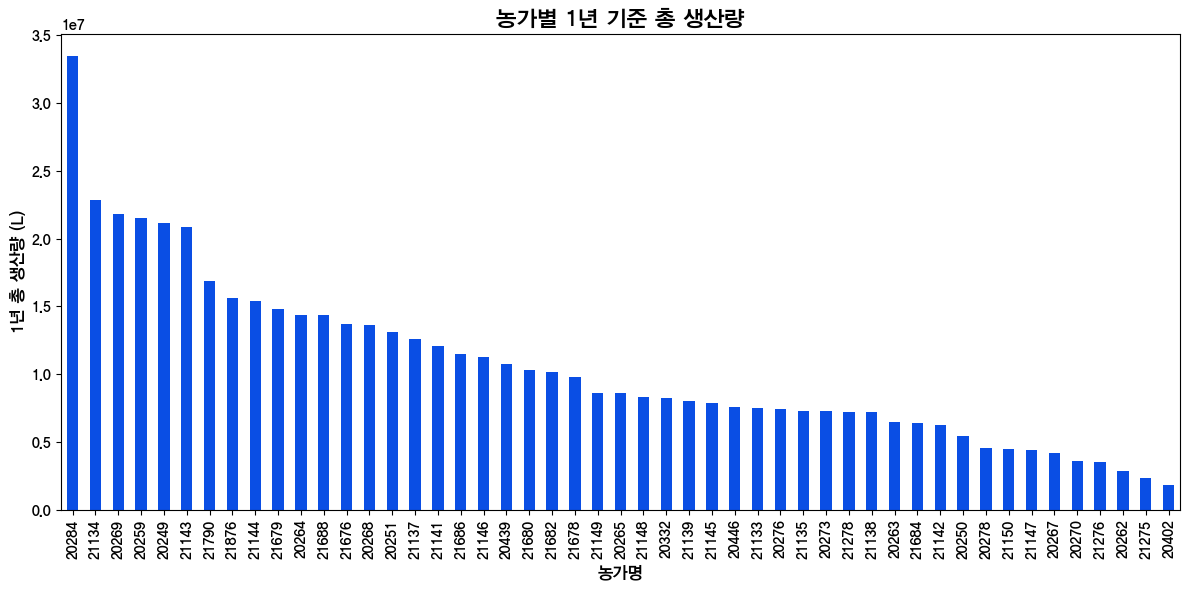

In [10]:
# 그래프 크기 설정
plt.figure(figsize=(12,6))

# 막대그래프 그리기
farm_y.plot(kind='bar', color=blue_colors[0])

# 제목과 축 라벨
plt.title('농가별 1년 기준 총 생산량', fontsize=16)
plt.xlabel('농가명', fontsize=12)
plt.ylabel('1년 총 생산량 (L)', fontsize=12)

# x축 글자 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.tight_layout()
plt.show()

In [11]:
pandas_kwargs = {
    'memory_map': True,
    'date_format': '%Y%m%d.0'
}

robot: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '로봇착유기.csv', **pandas_kwargs)
ict: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / 'ICT착유기.csv', **pandas_kwargs)

In [12]:
columns_to_analyze = [
    '개체번호', '혈통번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백',
    '무지고형분', '체세포수', '우유내요소태질소', '305일유량', '305일유지량', '305일유단백',
    '305일무지고형분', '성년유량', '성년유지량', '성년유단백량', '성년무지고형분량',
    '전산차비유지속성', '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량',
    '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MNU'
]

report_1 = report[columns_to_analyze].copy()


In [13]:
# 중복된 행 확인
duplicates = report_1[report_1.duplicated()]
duplicates.head()


,개체번호,혈통번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,성년유지량,성년유단백량,성년무지고형분량,전산차비유지속성,현재산차비유지속성,비유최고도달일수,비유후기최고유량,비유초기평균유지율,비유초기평균단백율,비유초기평균MNU
6384,20161027010038,NaN,2020-01-09,170,4.13,3.10,8.99,69,24.4,10899.0,...,415,345,1032,0.0,75,201.0,46.0,3.49,3.02,55.0
6470,20161027010038,NaN,2020-02-09,201,2.78,3.20,9.14,35,18.9,11200.0,...,429,359,1072,0.0,75,201.0,46.0,3.49,3.02,55.0
6556,20161027010038,NaN,2020-03-09,201,0.00,0.00,0.00,0,0.0,11200.0,...,429,359,1072,0.0,75,201.0,46.0,3.49,3.02,55.0
6642,20161027010038,NaN,2020-04-08,201,0.00,0.00,0.00,0,0.0,11200.0,...,429,359,1072,0.0,75,201.0,46.0,3.49,3.02,55.0
6735,20161027010038,NaN,2020-05-10,292,3.71,3.09,8.86,87,17.1,11302.0,...,435,367,1103,0.0,75,201.0,46.0,3.49,3.02,55.0


In [14]:
# 분석 대상 컬럼 리스트
cols_305 = ['305일유량', '305일유지량', '305일유단백', '305일무지고형분']

# 데이터의 초기 상태 확인 (선택 사항)
print("### 데이터프레임 상위 5행 및 컬럼 정보 확인 ###")
print(report_1[cols_305].head())
print(report_1[cols_305].info())

### 데이터프레임 상위 5행 및 컬럼 정보 확인 ###
    305일유량  305일유지량  305일유단백  305일무지고형분
0   9714.0    498.0    276.0      805.0
1  14570.0    553.0    467.0     1271.0
2      0.0      0.0      0.0        0.0
3  11008.0    491.0    343.0      971.0
4  11318.0    554.0    373.0     1011.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100549 entries, 0 to 100548
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   305일유량     100549 non-null  float64
 1   305일유지량    100549 non-null  float64
 2   305일유단백    100549 non-null  float64
 3   305일무지고형분  100549 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None


### 1-1. 305일 보정 성적 기술 통계량 ###
              count         mean          std  min  25%  50%      75%      max
305일유량     100549.0  5167.338561  5557.744267  0.0  0.0  0.0  10614.0  21284.0
305일유지량    100549.0   207.840585   228.460258  0.0  0.0  0.0    420.0   1235.0
305일유단백    100549.0   165.616048   178.080687  0.0  0.0  0.0    340.0    659.0
305일무지고형분  100549.0   451.205084   485.268822  0.0  0.0  0.0    924.0   1768.0

### 1-2. 데이터 분포 시각화 (히스토그램) ###


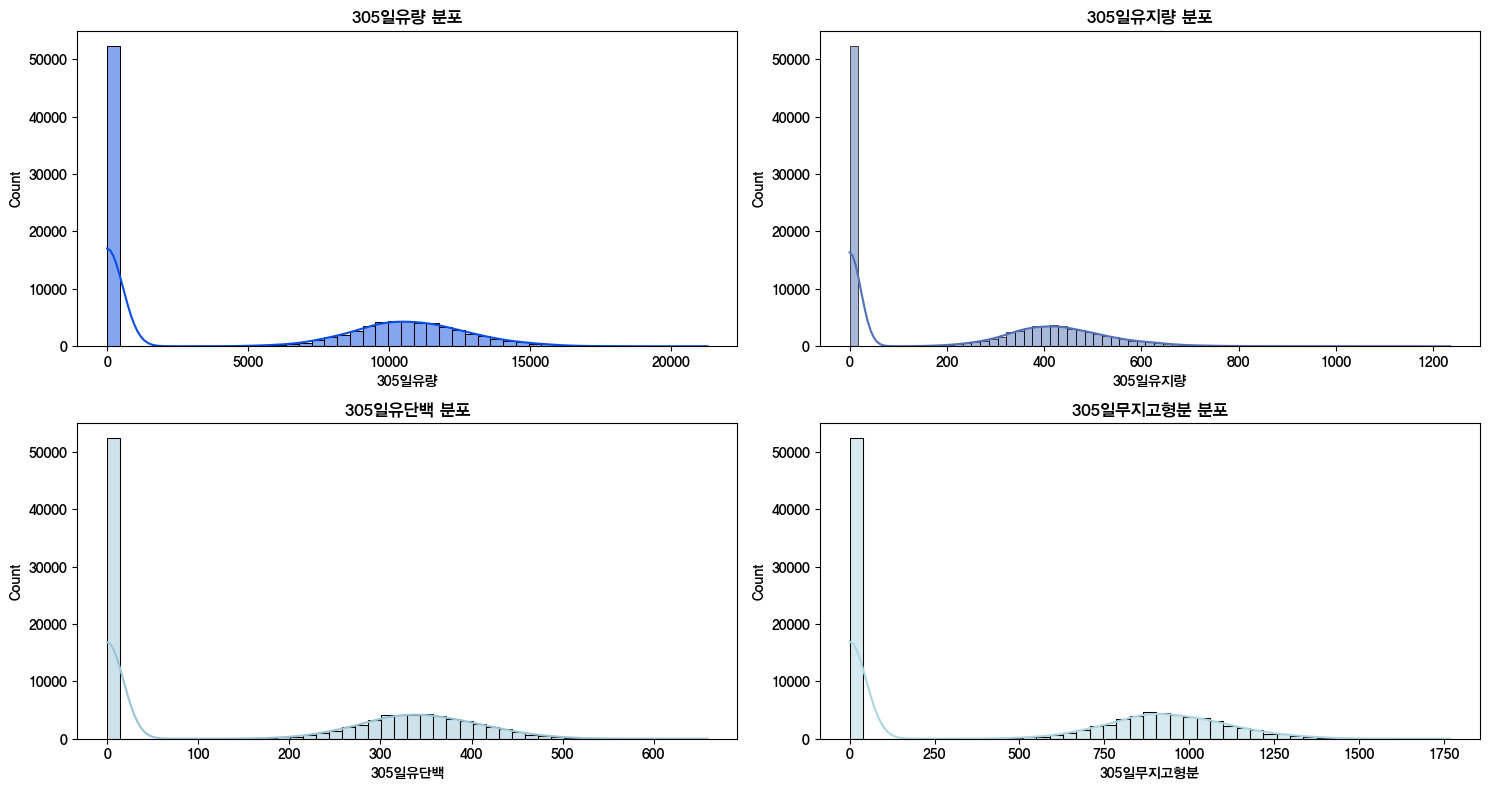

In [15]:
print("### 1-1. 305일 보정 성적 기술 통계량 ###")
print(report_1[cols_305].describe().T)

print("\n### 1-2. 데이터 분포 시각화 (히스토그램) ###")
plt.figure(figsize=(15, 8))

for i, (color, col) in enumerate(zip(blue_colors[:4], cols_305)):
    plt.subplot(2, 2, i + 1)
    # 결측치(NaN)가 있을 경우를 대비하여 dropna()를 적용하는 것이 안전합니다.
    sns.histplot(report_1[col].dropna(), kde=True, color=color) 
    plt.title(f'{col} 분포', fontsize=12)
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

-> 절반 이상 착유 기록이 없거나 0으로 나타나지만, 일부 소는 305일동안 매우 많은 우유와 성분 생산

### 2-1. 305일 보정 성적 간 상관 행렬 ###
             305일유량   305일유지량   305일유단백  305일무지고형분
305일유량     1.000000  0.967882  0.995557   0.998505
305일유지량    0.967882  1.000000  0.968065   0.969208
305일유단백    0.995557  0.968065  1.000000   0.997605
305일무지고형분  0.998505  0.969208  0.997605   1.000000


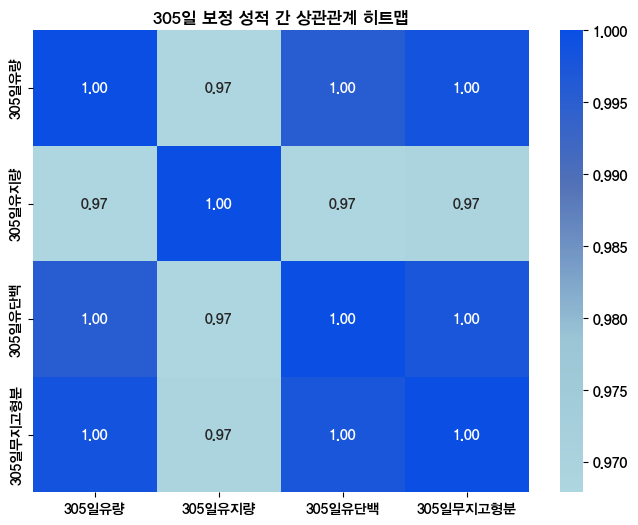

In [16]:


print("### 2-1. 305일 보정 성적 간 상관 행렬 ###")
correlation_matrix = report_1[cols_305].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=blue_cmap, fmt=".2f")
plt.title('305일 보정 성적 간 상관관계 히트맵')
plt.show()

-> 생산성이 높은 소는 전반적으로 우수(단순히 유량만 많은 것이 아니라 모든 성분이 같이 높음)


In [17]:
# 체세포수 단위는 10^3 cells/mL 기준으로 가정
report_1['질병군'] = report_1['체세포수'].apply(lambda x: '정상' if x < 200 else '의심')
report_1['질병군'].value_counts()


질병군
정상    91257
의심     9292
Name: count, dtype: int64

- -> 약 10%의 소가 의심군, 90%는 정산군이기에 질병균 특성이 잘 안 보일 수 있음
- -> 그룹별 비교 중요

In [18]:
cols = ['305일유량', '305일유지량', '305일유단백', '305일무지고형분']

# 그룹별 통계 계산
group_summary = report_1.groupby('질병군')[cols].agg([
    ('0값비율', lambda x: (x==0).sum() / x.count() * 100),
    ('평균', 'mean'),
    ('중앙값', 'median'),
    ('상위25%', lambda x: x.quantile(0.75))
])

group_summary


305일유량                                    305일유지량                     \
          0값비율           평균      중앙값     상위25%       0값비율          평균    중앙값   
질병군                                                                            
의심   17.272923  9054.869458  10389.5  11961.25  17.272923  366.574473  411.0   
정상   55.560669  4771.501123      0.0  10358.00  55.560669  191.677932    0.0   

              305일유단백                            305일무지고형분                     \
     상위25%       0값비율          평균    중앙값  상위25%       0값비율          평균    중앙값   
질병군                                                                             
의심   491.0  17.272923  290.360525  334.0  382.0  17.272923  787.801980  902.0   
정상   409.0  55.560669  152.914275    0.0  332.0  55.560669  416.932005    0.0   

             
      상위25%  
질병군          
의심   1040.0  
정상    904.0

- 정상군은 절반 이상이 착유 기록이 없거나 0값으로 나타나지만, 상위 생산 소는 정상군에도 존재
- 평균만 보면 의심군이 더 높게 보이지만, 착유 중인 소 기준으로 보면 두 그룹의 상위 생산 소는 비슷


In [19]:
# 착유기(305일유량 > 0) 개체만 필터링
report_milking = report_1[report_1['305일유량'] > 0].copy()

# 그룹별(질병군) 통계 요약
stats_milking = report_milking.groupby('질병군')[['305일유량', '305일유지량', '305일유단백', '305일무지고형분']].agg(['count', 'mean', 'median', 'std', 'min', 'max']).T

stats_milking


질병군                         의심            정상
305일유량    count    7687.000000  40554.000000
          mean    10945.472486  10737.112936
          median  10881.000000  10681.000000
          std      1970.488848   2014.135229
          min      4055.000000    755.000000
          max     21284.000000  21284.000000
305일유지량   count    7687.000000  40554.000000
          mean      443.113048    431.324974
          median    437.000000    423.000000
          std       106.754727    105.322961
          min       124.000000     30.000000
          max      1033.000000   1235.000000
305일유단백   count    7687.000000  40554.000000
          mean      350.986080    344.096711
          median    350.000000    342.000000
          std        63.419654     64.171447
          min       111.000000     28.000000
          max       659.000000    659.000000
305일무지고형분 count    7687.000000  40554.000000
          mean      952.290360    938.204961
          median    945.000000    930.000000
          std       173.062576    175.567401
          min       333.000000     67.000000
          max      1673.000000   1768.000000

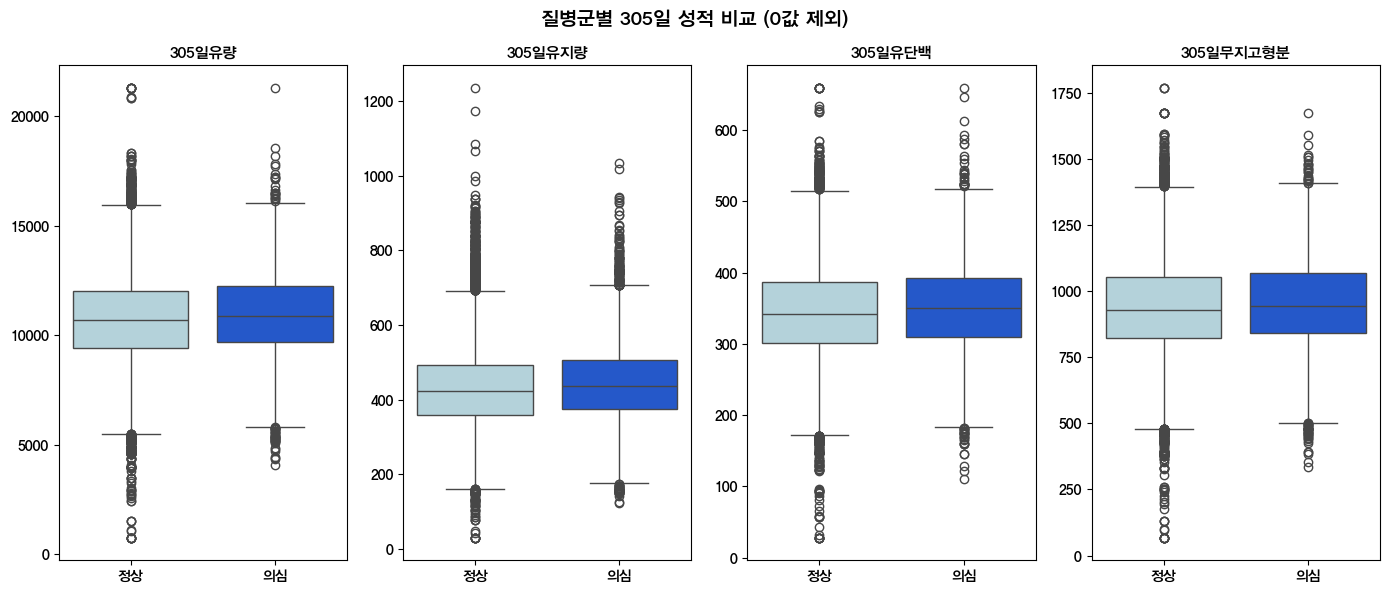

In [26]:
# 0값 필터링 (305일 관련 값 중 하나라도 0이 아닌 행만 남기기)
report_nonzero = report_1[
    (report_1['305일유량'] > 0) &
    (report_1['305일유지량'] > 0) &
    (report_1['305일유단백'] > 0) &
    (report_1['305일무지고형분'] > 0)
]

# 시각화용 컬럼 목록
cols = ['305일유량', '305일유지량', '305일유단백', '305일무지고형분']

plt.figure(figsize=(14, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='질병군', y=col, data=report_nonzero,
                palette={'의심': blue_colors[0], '정상': blue_colors[3]}, hue='질병군', legend=False)
    plt.title(col, fontsize=11)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('질병군별 305일 성적 비교 (0값 제외)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


-> 의심군도 정상군과 유사한 생산량을 유지하고 있음

In [21]:
# 비교할 컬럼 목록
cols = ['유지방율', '유단백', '무지고형분']

# 질병군별 평균 계산
group_means_all = report_1.groupby('질병군')[cols].mean().reset_index()

# melt로 세로형 변환
group_melted_all = group_means_all.melt(id_vars='질병군', var_name='항목', value_name='값')

group_melted_all

,질병군,항목,값
0,의심,유지방율,4.314596
1,정상,유지방율,1.691217
2,의심,유단백,3.382810
3,정상,유단백,1.351051
4,의심,무지고형분,8.793632
5,정상,무지고형분,3.623574


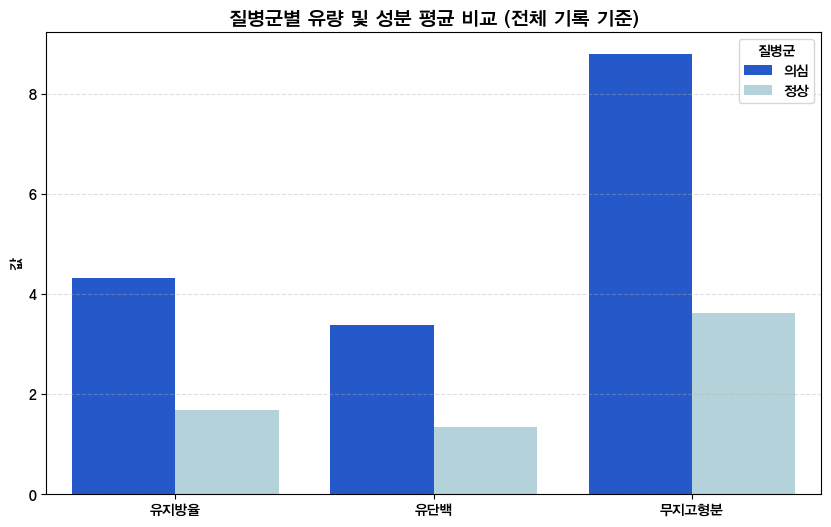

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=group_melted_all, x='항목', y='값', hue='질병군', palette={'의심': blue_colors[0], '정상': blue_colors[3]})

plt.title('질병군별 유량 및 성분 평균 비교 (전체 기록 기준)', fontsize=14)
plt.ylabel('값')
plt.xlabel('')
plt.legend(title='질병군')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


- 체세포 수 기반 의심군이 실제로 우유 성분의 농도가 높게 나타남
- 질병이 있는 소는 고형분 농도가 높아지는 경향
- -> 생산성 저하와 건강 이상 의미